<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Analisi di un caso reale**:  Telco customer churn

Imposta e realizza un modello predittivo per calcolare il tasso d'abbandono di ciascun cliente usando i dati a disposizione *Telco_customer_churn.csv*,
seguendo i seguenti passi:

- Definire il tipo di problema di apprendimento 
- EDA
- Data preprocessing
- Data Modeling
- Optimization hyperparameter
- Model Evaluation
- Aggiungi delle conclusioni da portare a un ipotetico cliente (che non sa nulla di data science) per convincerlo che il tuo modello predittivo è valido. Inoltre porta qualche esempio di come ne può beneficiare il suo business

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Esercizio extra facoltativo:

Come puoi salvare il modello per riutilizzarlo?



In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 2536)
pd.set_option('display.max_columns', 100)

In [70]:
df = pd.read_csv("Telco_customer_churn.csv")

# Drop all useless columns

useless = ['CustomerID', 'Count', 'Country', 'State', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Churn Label']
df.drop(useless, axis=1, inplace=True)

In [71]:
df.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


<BarContainer object of 20 artists>

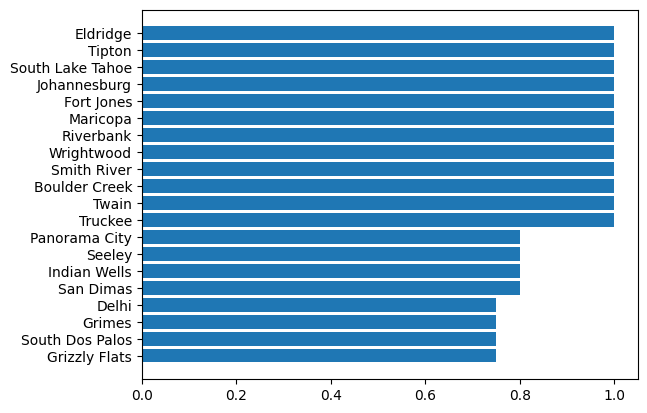

In [72]:
# Let's calculate the churn rate by city
cities_values = df['City'].value_counts().sort_index()
cities_churns = df[['City', 'Churn Value']].groupby("City").sum()['Churn Value'].sort_index()
cities_churns_rate = cities_churns / cities_values
cities_churns_rate = cities_churns_rate.sort_values()[-20:]

plt.barh(cities_churns_rate.index, cities_churns_rate.values)

<BarContainer object of 2 artists>

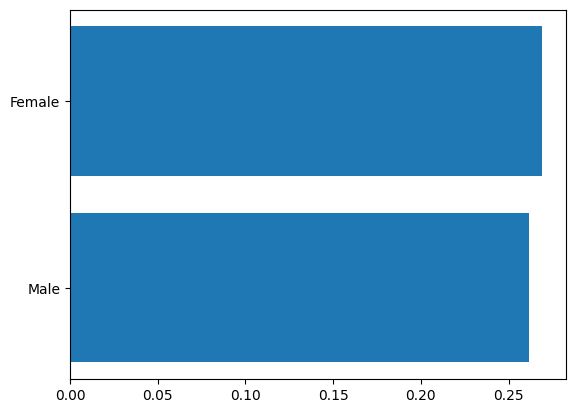

In [76]:
# Let's calculate the churn rate by city
gender_values = df['Gender'].value_counts().sort_index()
gender_churns = df[['Gender', 'Churn Value']].groupby("Gender").sum()['Churn Value'].sort_index()
gender_churns_rate = gender_churns / cities_values
gender_churns_rate = gender_churns_rate.sort_values()

plt.barh(gender_churns_rate.index, gender_churns_rate.values)

So the gender column can be dropped =)

In [77]:
df.drop('Gender', axis=1, inplace=True)

<BarContainer object of 2 artists>

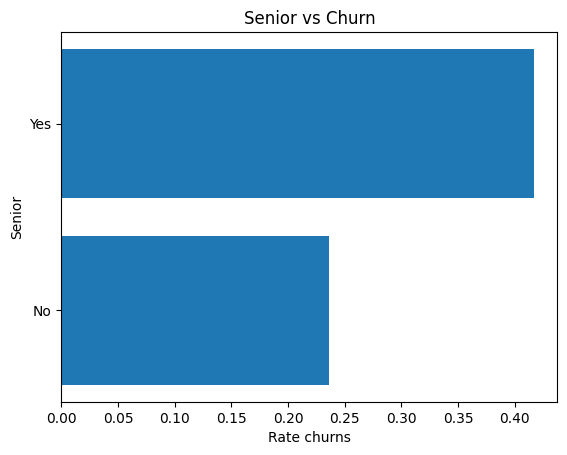

In [82]:
# Let's calculate the churn rate by city
senior_values = df['Senior Citizen'].value_counts().sort_index()
senior_churns = df[['Senior Citizen', 'Churn Value']].groupby("Senior Citizen").sum()['Churn Value'].sort_index()
senior_churns_rate = senior_churns / senior_values
senior_churns_rate = senior_churns_rate.sort_values()

plt.xlabel("Rate churns")
plt.ylabel("Senior")
plt.title("Senior vs Churn")

plt.barh(senior_churns_rate.index, senior_churns_rate.values)

In [79]:
df.head()

,City,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,Los Angeles,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


<BarContainer object of 2 artists>

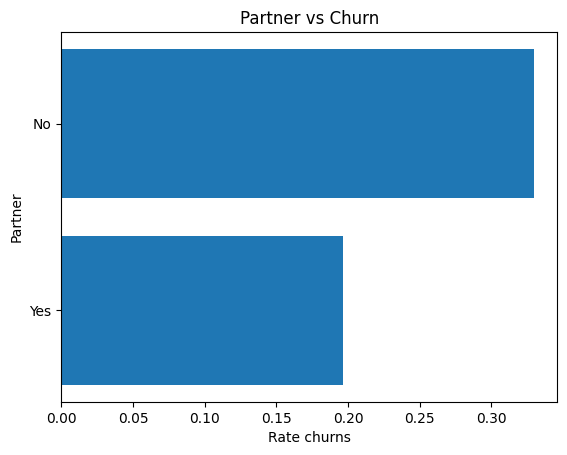

In [81]:
# Let's calculate the churn rate by city
partner_values = df['Partner'].value_counts().sort_index()
partner_churns = df[['Partner', 'Churn Value']].groupby("Partner").sum()['Churn Value'].sort_index()
partner_churns_rate = partner_churns / partner_values
partner_churns_rate = partner_churns_rate.sort_values()

plt.xlabel("Rate churns")
plt.ylabel("Partner")
plt.title("Partner vs Churn")

plt.barh(partner_churns_rate.index, partner_churns_rate.values)

Verify if there is a correlation between Seniors and Partners

In [88]:
#df['Senior Citizen N'] = 1 if df['Senior Citizen'] == 'Yes' else 0
df['Partner N'] = [1 if df['Partner'] == 'Yes' else 0]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [85]:
sns.heatmap(df[['Senior Citizen', 'Partner']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (4, 1) and (4,))